# Analyzing Geiger Counter Data

<p>This python script is designed for the AWARE RM-60 <i>Micro Roentgen Radiation Monitor</i> though it should work with data from other counters.</p>
<p>The RM-60 is connected to and powered by an Arduino Uno.</p>
<p>The Arduino code is an interrupt driven counter that for each count outputs the time since the previous count. The data are in seconds. My script that reads the RM-60 saves there time differences to the data file. It also outputs the counts per minute once a minute, along with the cumulative average CPM. This data starts with a <tt>#</tt> character so it can be filtered out as a comment. </p>
<p>This script reads the data files from disk and puts the arrival time differences into a <tt>numpy</tt> array. Right now the script prints out the files with the suffix <tt>.csv</tt>. Right now there is a maximum of 200000 data points.</p>

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pylab as plt
import numpy as np
import glob
fileList = glob.glob('*.csv')
fileList.sort()
for (i,fileName) in enumerate(fileList):
    print "%d - %s" % (i, fileName)
iFile = int(raw_input("Enter the number of the data file: "))
fileName = fileList[iFile]
MAX_DATA = 200000

0 - FirstRun.csv
1 - RM60-201802201527.csv


Enter the number of the data file:  1

In [11]:
fpData = open(fileName, 'r')
dataArray = np.genfromtxt(fileName, dtype=type(0.), comments='#', delimiter=',')
fpData.close()
nPoints = len(dataArray)
print "Read %d arrival time intervals" % (nPoints)

Read 139211 arrival time intervals


<p>Now print out some information about the data.</p>
<p>There often seems to be a very rogue data point. Try to edit those out.</p>

iBad[0] =  []
There are 1 suspicious points
The median is:  2.969377
4.30269441879
Now there are 139211 data points
Here are the first 20 data points:
[  3.46000000e-04   3.41967200e+00   9.17830000e-01   1.61388850e+01
   1.00373830e+01   1.74591800e+00   1.68036600e+00   8.70353000e-01
   2.64288000e+00   5.01537000e-01   1.23822100e+00   8.00409500e+00
   6.99217900e+00   1.85055500e+00   6.95972700e+00   9.30153000e-01
   5.63838900e+00   1.98919100e+00   1.35911920e+01   3.88681400e+00]
The data range is from 0.000 to 52.334
The average and standard deviation are 4.30269 +/- 4.30669
The standard deviation of the mean is 0.01154
The median of the data is 2.969
Average Counts per Minute = 13.944750
There were 85 zero intervals


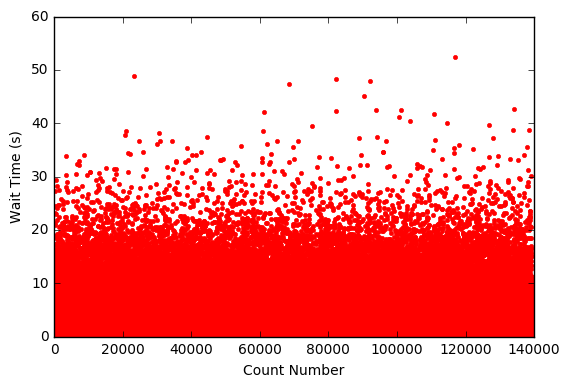

In [14]:
avg0 = np.average(dataArray)
iBad = np.where(dataArray > 20*avg0)
print "iBad[0] = ", iBad[0]
print "There are %d suspicious points" % (len(iBad))
dataArray = np.delete(dataArray, iBad)
nPoints =  len(dataArray)
med = np.median(dataArray)
print "The median is: ", med
print avg0
std0 = np.std(dataArray)
print "Now there are %d data points" %(nPoints)
print "Here are the first 20 data points:\n", dataArray[:20]
print "The data range is from %.3f to %.3f" % (np.min(dataArray), np.max(dataArray))
print "The average and standard deviation are %.5f +/- %.5f" % (avg0, std0)
print "The standard deviation of the mean is %.5f" % (np.std(dataArray)/np.sqrt(nPoints))
print "The median of the data is %.3f" % (np.median(dataArray))
print "Average Counts per Minute = %f" % (60.0 / np.average(dataArray))
print "There were %d zero intervals" % (len(np.where(dataArray < 0.001)[0]))
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(dataArray, 'r.')
ax.set_xlabel("Count Number")
ax.set_ylabel("Wait Time (s)")

<p>Finally plot the histogram on a linear and a logarithmic scale.</p>

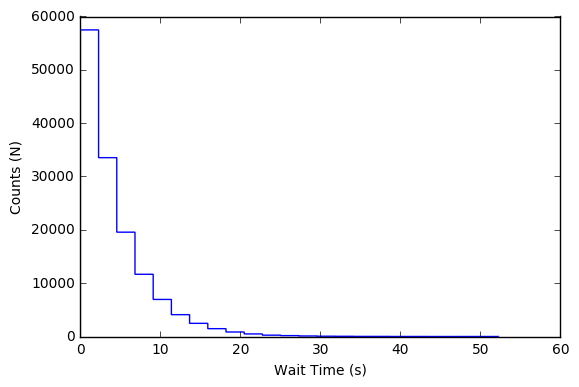

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,23,histtype='step', log=False)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")


(1, 100)

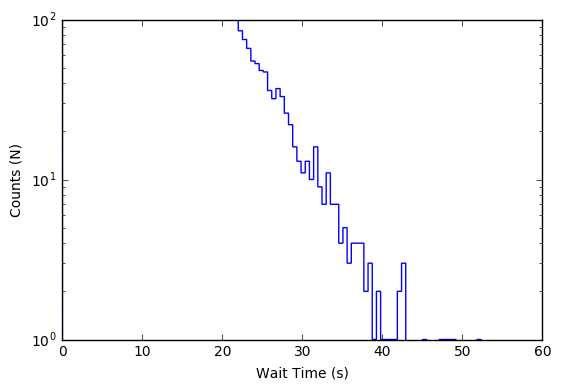

In [7]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,100,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")
ax.set_ylim(1,100)

width =  0.291990497959
Using 179 bins


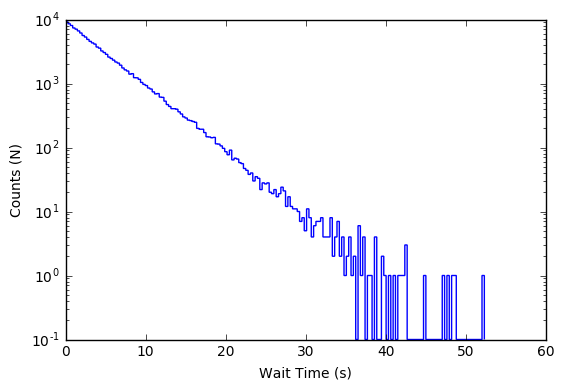

In [8]:
width = 3.5 * std0 / nPoints**(.333)
print "width = ", width
nBins = int(np.max(dataArray) / width)
print "Using %d bins" % (nBins)
bins = np.arange(0, np.max(dataArray), width)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,nBins,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")